<a href="https://colab.research.google.com/github/CoAxLab/Data-Explorations/blob/main/book/exercises/mediation-and-moderation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 14: Mediation

This homework assignment is designed to give you practice with mediation. You won't need to load in any data for this homework -- we'll simulate data instead.

1. Simulating data 3/3
2. Visualizing data 2/2
3. Mediation analysis 4/4
4. Reflection 1/1

---
## 1. Simulating data (3 points)


In this homework, we're going to simulate the relationship between age, word reading experience, and reading comprehension skill. Older children tend to be better at reading comprehension tasks, but this isn't just an inherent part of getting older. It's a combination of gaining more experience with reading, oral language skills, and executive functions development. In this homework, though, we're going to simplify this relationship down to a direct effect of age on reading comprehension (since improvements in oral language skills and executive functions are more guaranteed as children age than reading practice is), and a mediation of word reading experience.

In graphical form:
![picture](https://drive.google.com/uc?id=1wdm9xuiJhBJor99-9GnicO2_rzkGWtfN)

Writing the relationship out formally:

$$x = \beta_{xa} a + \beta_{x0} + \epsilon_{x}$$

$$c = \beta_{ca} a + \beta_{cx} x + \beta_{c0} + \epsilon_c$$



$c$ is reading comprehension, $x$ is word reading experience, and $a$ is age. $\beta_{c0}$ and $\beta_{x0}$ are intercept terms for their respective formulas, and $\epsilon_{c}$ and $\epsilon_{x}$ are gaussian noise terms. We'll start by writing a function, `simulate_data`, that can simulate this relationship. The input values are set and the function structure is provided below. Complete the function such that it takes in those input variables and generates $age$, $x$, and $c$ values. Use `runif()` to generate ages. Use `rnorm()` to generate the noise terms.

In [ ]:
sample_size = 100 # How many children in data set?
age_lo = 80     # minimum age, in months
age_hi = 200    # maximum age, in months
beta_xa = 0.5   # amount by which experience changes for increase of one month in age
beta_x0 = -5    # amount of experience when age = 0 (not interpretable, since minimum age for this data is 80 months)
sd_x = 50       # standard dev of gaussian noise term, epsilon_x
beta_ca = 0.8   # amount that comprehension score improves for every increase of one unit in age
beta_cx = 3     # amount that comprehension score improves for every increase of one unit in reading experience
beta_c0 = 10    # comprehension score when reading experience is 0.
sd_c = 85      # standard dev of gaussian noise term, epsilon_c

simulate_data <- function(sample_size, age_lo, age_hi, beta_xa,
                          beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
    age = runif(sample_size, min = age_lo, max = age_hi) #age
    epsilon_x = rnorm(sample_size, mean = 0, sd = sd_x) #reading
    x = beta_xa * age + beta_x0 + epsilon_x

    epsilon_c = rnorm(sample_size, mean = 0, sd = sd_c) #comprehension
    c = beta_ca * age + beta_cx * x + beta_c0 + epsilon_c

    return(data.frame(age = age, experience = x, comprehension = c))
}

dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
head(dat)

,age,experience,comprehension
,<dbl>,<dbl>,<dbl>
1,103.79356,35.49223,97.84290
2,106.44661,42.53022,225.01557
3,91.44397,19.25494,270.05840
4,99.05252,94.16333,518.76200
5,105.08165,15.52251,92.99394
6,170.00969,-1.10338,143.27016


---
## 2. Visualizing Data (2 point)

Load the `tidyverse` library.

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


a) Plot the relationship between age and reading comprehension.

`geom_smooth()` using formula = 'y ~ x'


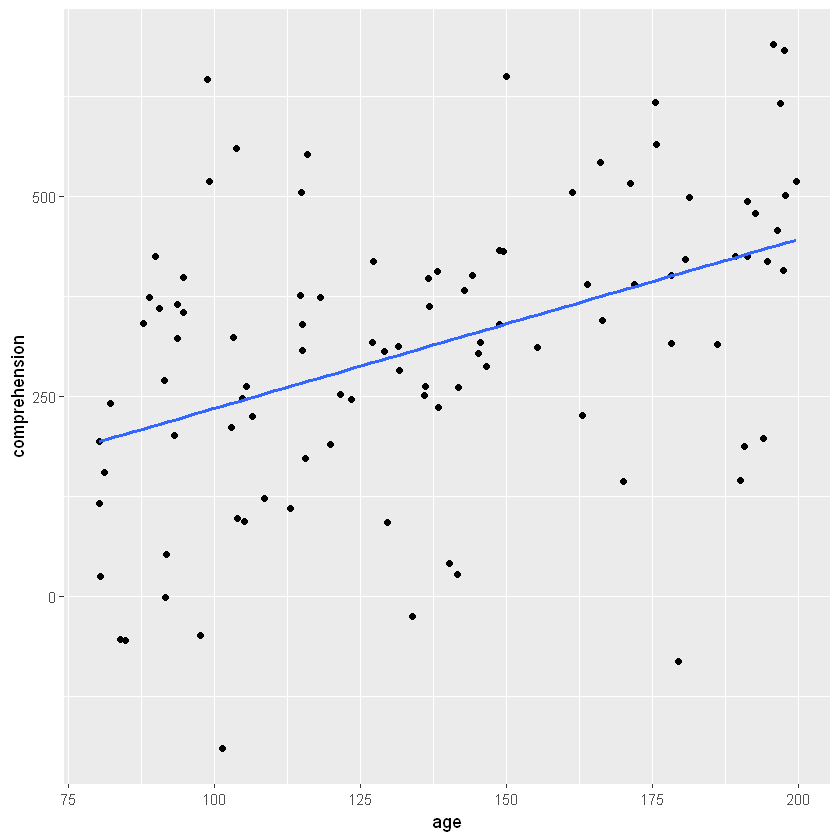

In [ ]:
ggplot(dat, aes(x = age, y = comprehension)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

b) Plot the relationship between reading experience, age, and reading comprehension.

In [ ]:
ggplot(dat, aes(x = experience, y = comprehension, color = age)) +
  geom_point() +
  scale_color_viridis_c()


---
## 3. Mediation Analysis (4 points)

Load the `mediation` library.

In [ ]:
library(mediation)


Use the `mediate` function to determine whether `x` mediates the relationship between `age` and `c`. Use `summary()` to print the model results. *Hint: see the mediation and moderation tutorial.*

In [ ]:
mediator_mod = lm(experience ~ age, data = dat)
lmod = lm(comprehension ~ age + experience, data = dat)

med = mediate(mediator_mod, lmod, treat = "age", mediator = "experience", boot = TRUE, sims = 1000)

summary(med)


Running nonparametric bootstrap





Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME              1.239        0.433         1.99   0.002 ** 
ADE               0.877        0.395         1.40  <2e-16 ***
Total Effect      2.116        1.234         2.96  <2e-16 ***
Prop. Mediated    0.585        0.317         0.78   0.002 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Sample Size Used: 100 


Simulations: 1000 


---
## 5. Reflection (1 point)
How do you interpret these results? Why do you think the analysis yielded this result?

> Based on these results, it appears that experience somewhat mediates the relationship between age and reading comprehension. The average causal mediation effect (ACME) is significant (p < .05), which indicztes that reading experience improves with age, and subsequently, it improves comprehension.
>

**DUE:** 5pm EST, April 1, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*